# Mandarin NLP Project

First we will start by importing neccessary packages and files. 

In [1]:
import pandas as pd
import os

Next, we import the dataframes files we will use and concat them. 

In [2]:
one = pd.read_csv("Data/doc1.csv")
two = pd.read_csv("Data/doc2.csv")

We are only interested in the Answer column so let's filter it out. 

In [3]:
frames = [one, two]
data = pd.concat(frames) 
data = data["Answer"]

We are also interested in filtering out certain "stop words" in Chinese or words that do not make sense to include in the context of the question. It doesn't make sense to leave feedback that says "very good" or "很好“ so we will leave words and phrases like those out.
Since the comments that do not fit the context of the question consist of short a short series of characters, let's limit the list to 4 characters and above and remove any comments with the words "very good" and "don't know" in them since
they do not fit the context of this question. 

Let's also get rid of the number that we see in the set. 

## Getting Rid of Out-of-Context Comments 

In [4]:
clean_list = (filter(lambda x : len(x) > 4 , data))

In [5]:
clean_list = pd.DataFrame(clean_list)

Let's first strip any extra whitespaces from the text. 

In [6]:
clean_list[0] = clean_list[0].str.strip()

In [7]:
import re 

cleaner_list = []

for i in clean_list[0]:
    if "好" in i:
        pass
    if "很好" in i:
        pass
    elif "没有" in i:
        pass
    elif i.isdigit():
        pass
    else:
        cleaner_list.append(i)     

Now we have removed digits and text that was out of context. 

In [8]:
cleaner_list

['知乐很不错',
 '贴近第一线员工，关心一线员工',
 '希望员工反应的问题能有所改变',
 '把问题公开，透明，调查的什么，解决的什么，大家都不知道。',
 '知乐是工人的心底之声',
 '深入员工工作现场，实地了解员工想法',
 '回头看看问题是不是根本解决了。',
 '让人数在多些，回了解到更多的问题',
 '积极参加。',
 '不是我们想想的1',
 '因为任性，所以有钱???',
 '想回家，但确实不怎么安全',
 '科学的探讨与研究，其本身就含有至美，其本身给人的愉快就是报酬；所以我在我的工作里面寻得了快乐',
 '关于公司企业文化认同',
 '多关心一下管理模式',
 '调查了就得，实行才好',
 '热情这东西其实也很脆弱，耗完了耐心，攒够了失望，剩余的就只有疲惫和冷漠了',
 '实事求是！坚持原则！',
 '停车场需改进',
 '调查很全面，细致',
 '员工反馈的问题得有个闭环反馈。',
 '有些题目太笼统',
 '可不可以和员工有一次面对面的交流，',
 '感觉不错，就是问题可以再多一些。',
 '改善速度点',
 '照片不硬性要求就更好了',
 '问题太频繁。没时间做',
 '希望一直都在',
 '多做点有实际意义的事',
 '多一些提完建议后改善的示例',
 '频率一周一次好点',
 '提高员工参与积极性，奖品发放次数少，奖品反应度不高。可以定制价格在1元左右的笔，可能更能提高积极性。',
 '关注一下员工心理健康',
 '无纸张调查',
 '多看看员工怎么说',
 '停车场还需要再次改造',
 '问题更新可以快些',
 '增加知识面',
 '多些选择题',
 '每个人的意见都能被重视',
 '希望多多发问题吧',
 '洗澡房和更衣室在一块不好里面朝适',
 '反馈根本不给解决 ，有意思吗？',
 '更衣室生锈的更换',
 '继续为员工提供更好的意见',
 '现在就可以的',
 '及时处理，让员工相信我们知乐第一时间解决问题就可以了',
 '多多贴进现实',
 '对一个问题有点反复',
 '设立个小信箱，可以让大家提一些对工作生活有改善的意见或建议！',
 '餐厅吃饭饭桌希望可以及时清理',
 '知乐社区不错以后多多支持',
 '能不能减少加班',
 '让更多的人参与',
 '每天干完活下班推迟',
 '天天发饮料雪糕少发',
 '反馈的

Next, we will use LatentDirichletAllocation and TfidfVectorizer to find the most important topics. Let's change n_components to 5 so that we can see the top five topics in the data. 

## Topic Extraction 

In [9]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(cleaner_list)

data_vectorized = vectorizer.transform(cleaner_list)

lda_model = LatentDirichletAllocation(n_components=5).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)


Topic 0:
[('餐厅吃饭饭桌希望可以及时清理', 1.1998173962053942), ('继续为员工提供更好的意见', 1.199817396196032), ('希望一直都在', 1.199817396184001), ('关注员工的需求', 1.199817396182469), ('改善速度点', 1.1998173961804879), ('有些题目太笼统', 1.1998173961789544), ('员工的心声', 1.1998173961777667), ('希望员工反应的问题能有所改变', 1.1998173961767513), ('多多贴进现实', 1.1998173961736007), ('每天干完活下班推迟', 1.1998173961667207)]
Topic 1:
[('现场很重要', 1.199817728968526), ('员工反馈的问题得有个闭环反馈', 1.1998177289677414), ('你一天的爱心可能带来别人一生的感谢', 1.199817728966825), ('照片不硬性要求就更好了', 1.1998177289662006), ('知乐很不错', 1.199817728963202), ('希望能继续努力下去', 1.199817728962725), ('洗澡房和更衣室在一块不好里面朝适', 1.1998177289582856), ('中班能不吃剩菜吗', 1.1998177289538614), ('伙食还没解决', 1.1998177289507705), ('可不可以和员工有一次面对面的交流', 1.1998177289477587)]
Topic 2:
[('车间温度太高', 1.199820389952296), ('频率一周一次好点', 1.1998203899506268), ('无纸张调查', 1.1998203899497495), ('多些选择题', 1.199820389945481), ('关注一下员工心理健康', 1.199820389945404), ('停车场还需要再次改造', 1.1998203899401145), ('问题可以加一点', 1.1998203899334707), ('回头看看问题是不是根本解决了', 1.19982038993034

Above we can see the 5 most popular topics with comments in their categories according to the LDA model. However, since this is quite a small data set of around 100 observations, 
it's only a guide that can help us find some patterns, but can't be completely relied on. To better improve this model, we would need a lot more data and to use a tokenizer and cut chinese Chinese text with an package called Jieba. This is especially the case given the structure of the Chinese language. 

Below we will export the dataframe, then use https://www.wordclouds.com/ to create our word cloud that can be seen accessing the "chinese_cloud" png in the Images folder of this repository. 

In [10]:
new_data = pd.DataFrame(cleaner_list)
new_data.to_csv("/Users/jessicaparker/Desktop/Data/Chinese_NLP_Project/main_chinese_translations.csv")

Next, we will use a Google API to translate all of the text at once. 

In [11]:
from googletrans import Translator

translator = Translator()

translations = []

for column in new_data.columns:
    # Unique elements of the column
    unique_elements = new_data[column].unique()
    
    for element in unique_elements:
        # Adding all the translations to a dictionary (translations)
        translations.append(translator.translate(element).text)
        
translations_df = pd.DataFrame(translations)


In [12]:
translations_df

,0
0,Zhile is very good
1,Be close to frontline employees and care about...
2,I hope that the problems that employees respon...
3,"Make the problem public and transparent, and e..."
4,Zhile is the voice of workers
...,...
103,"I hope more practical ones, such as the replac..."
104,Workers have power
105,Voice of employees
106,It is best to publicize the closed-loop situat...


## Processing English Text 

### Removing Punctuation and Tokenizing Text 

Now, let's take the translated comments, remove the punctuation, stopwords,  tokenize, amd lemmatize the text so that we have only words that can show context.

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessicaparker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jessicaparker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

These are all the stopwords that we will remove from the text because they don't add to meaning. 

In [15]:
translations_df

,0
0,Zhile is very good
1,Be close to frontline employees and care about...
2,I hope that the problems that employees respon...
3,"Make the problem public and transparent, and e..."
4,Zhile is the voice of workers
...,...
103,"I hope more practical ones, such as the replac..."
104,Workers have power
105,Voice of employees
106,It is best to publicize the closed-loop situat...


First, let's remove all of the punctuation, stop words, and tokenize the text.

In [16]:
translations_df[0]=translations_df[0].str.replace('[^\w\s]','').str.lower()


In [17]:
example_sent = str(translations_df[0])
  
stop_words = set(stopwords.words('english')) 
   
filtered_sentence = [] 
  
test =  nltk.sent_tokenize(example_sent)

for w in test: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        


translations_df['tokenized_sents'] = translations_df.apply(lambda row: nltk.word_tokenize(row[0]), axis=1)


In [18]:
translations_df

,0,tokenized_sents
0,zhile is very good,"[zhile, is, very, good]"
1,be close to frontline employees and care about...,"[be, close, to, frontline, employees, and, car..."
2,i hope that the problems that employees respon...,"[i, hope, that, the, problems, that, employees..."
3,make the problem public and transparent and ev...,"[make, the, problem, public, and, transparent,..."
4,zhile is the voice of workers,"[zhile, is, the, voice, of, workers]"
...,...,...
103,i hope more practical ones such as the replace...,"[i, hope, more, practical, ones, such, as, the..."
104,workers have power,"[workers, have, power]"
105,voice of employees,"[voice, of, employees]"
106,it is best to publicize the closedloop situati...,"[it, is, best, to, publicize, the, closedloop,..."


Now we can see that the text is clean and tokenized. This will make removing stop wrods and lemmatizing, or getting root words, text much easier. 

### Removing Stop Words and Lemmatizing Text 

After we remove the stop words here, we will lemmatize the text. This will give us root words my turning words like 'employees' into 'employee'

In [19]:
translations_df['tokenized_sents'] = translations_df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])

In [20]:
from nltk.stem import WordNetLemmatizer 

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text])

# df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
translations_df['text_lemmatized'] = translations_df['tokenized_sents'].apply(lemmatize_text)



translations_df

,0,tokenized_sents,text_lemmatized
0,zhile is very good,"[zhile, good]",zhile good
1,be close to frontline employees and care about...,"[close, frontline, employees, care, frontline,...",close frontline employee care frontline employee
2,i hope that the problems that employees respon...,"[hope, problems, employees, respond, changed]",hope problem employee respond changed
3,make the problem public and transparent and ev...,"[make, problem, public, transparent, everyone,...",make problem public transparent everyone know ...
4,zhile is the voice of workers,"[zhile, voice, workers]",zhile voice worker
...,...,...,...
103,i hope more practical ones such as the replace...,"[hope, practical, ones, replacement, rusty, wa...",hope practical one replacement rusty wardrobe ...
104,workers have power,"[workers, power]",worker power
105,voice of employees,"[voice, employees]",voice employee
106,it is best to publicize the closedloop situati...,"[best, publicize, closedloop, situation, problem]",best publicize closedloop situation problem


Here we can see the difference in all the columns that have been taken in each step. The last column "text_lemmatized" features the cleanest text, so we will use this for the wordcloud.

Now, let's see if we can extract any topics from the English text. Since words in Chinese have no spcaes between them, the results will be a bit different. 

In [21]:

vectorizer = TfidfVectorizer().fit(translations_df['text_lemmatized'])

data_vectorized = vectorizer.transform(translations_df['text_lemmatized'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)


Topic 0:
[('employee', 4.919817443008663), ('attention', 2.4201879483611997), ('pay', 2.420187948361199), ('feedback', 2.3010213475038435), ('voice', 2.1519448753977084), ('room', 1.5162532583892956), ('investigating', 1.328375869711469), ('listen', 1.2389527909745768), ('resolved', 1.2356205364989197), ('really', 1.184039323897793)]
Topic 1:
[('problem', 4.5660587972601805), ('worker', 2.449173931974275), ('time', 2.0206081495500223), ('increase', 1.8370394914096215), ('hope', 1.7732276309556094), ('add', 1.531109622315685), ('soup', 1.4209676103666253), ('respond', 1.4028240645342211), ('solved', 1.3794572409077273), ('eat', 1.3793427687031368)]
Topic 2:
[('parking', 2.3943244228728675), ('lot', 2.3943244228728484), ('zhile', 2.347707482188787), ('employee', 2.2395090542738116), ('question', 2.14665214126313), ('good', 2.090457325036896), ('hope', 1.8848630422603458), ('ok', 1.6983048312439126), ('survey', 1.682863255534311), ('much', 1.6556699223941298)]


We can see the major topics. However, again this is simply a guide and would need much more data to gain greater accuracy.  

Next, we will create a work cloud the features the sizes of the words according to their frequency. 

In [22]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

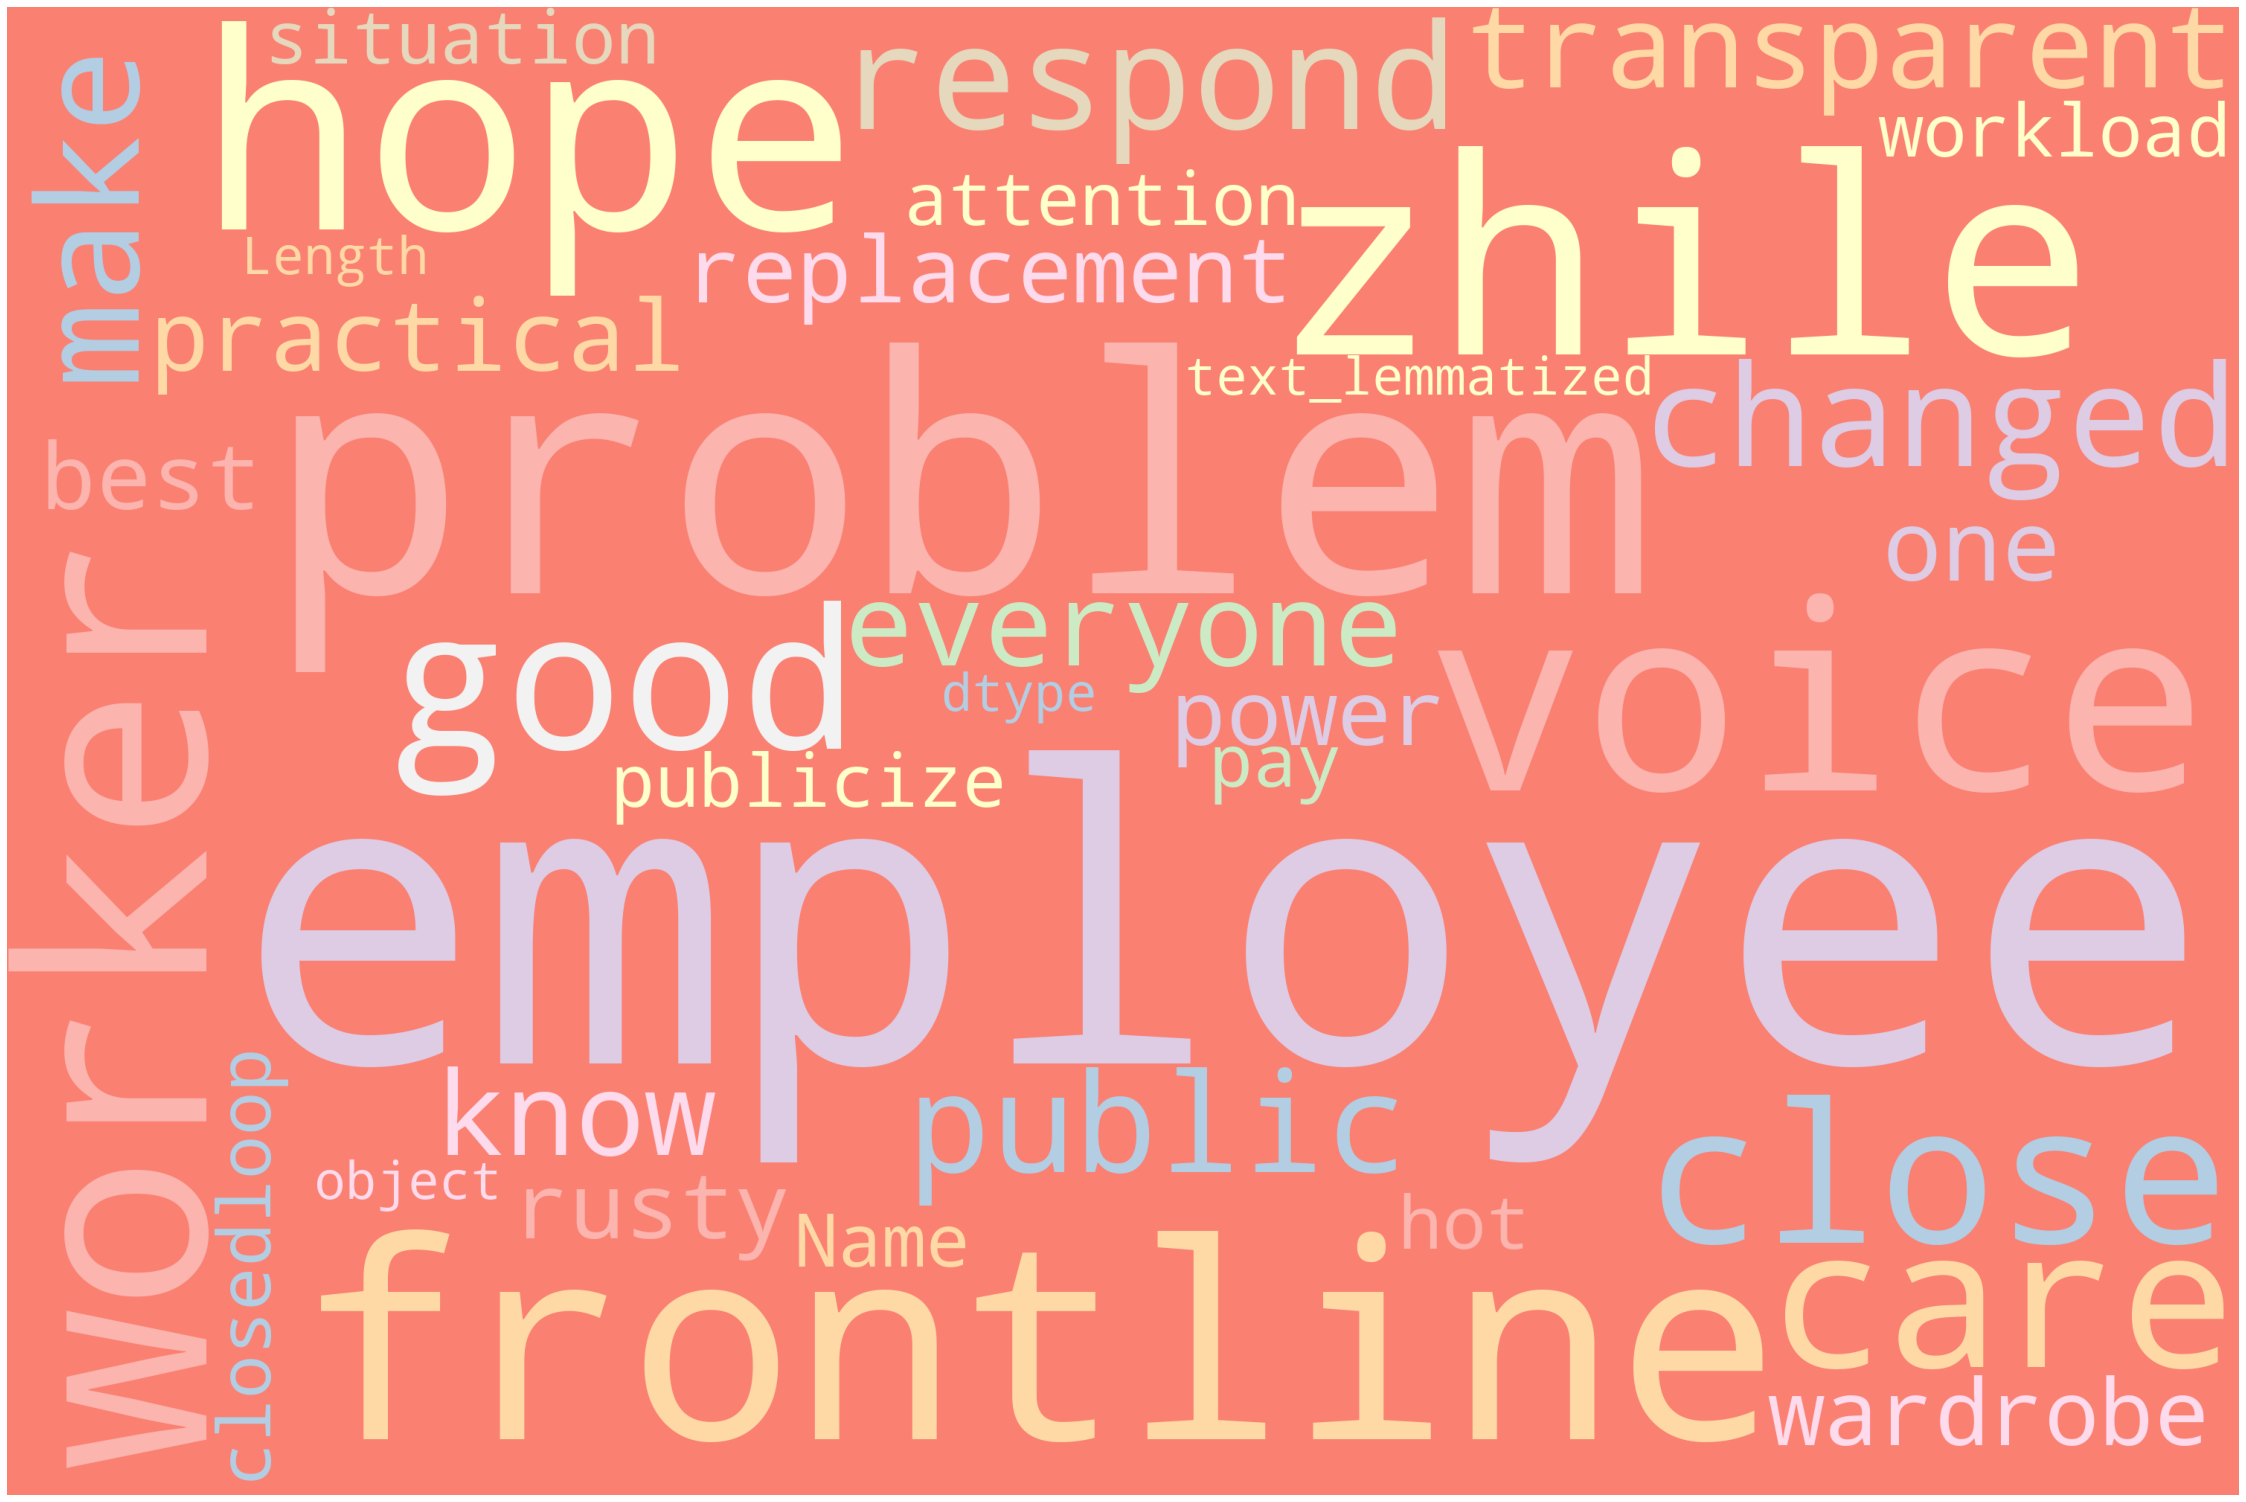

In [23]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000,  max_words=600, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(str(translations_df['text_lemmatized']))
# Plot
                                                                                                                                               
plot_cloud(wordcloud)